# Seizure Prediction and Identification Final Conclusions
This capstone started hoping to predict seizures by...

#### **Using the brain's raw electical output to see if:**
1. Can simple modeling techniques be used to predict seizures.
2. Can changes in electrical output indicate a patient's so-called "aura:" when the patient can feel something off and knows a seizure is coming.

Predicting the seizure in advance proved impossible, but there were...


#### **Bonus Insights Emergent from the Analysis:**
1. Clustering provides a means to simplify Epilepsy diagnoses.
2. Fast Fourier Transforms and a patient's baseline can be used to alert hospitals and patient families a seizure is imminent.

In [74]:
%%capture
%run model_runs_pres.ipynb

But first:

# **What does the seizure look like?**

Some notes on the dataframe below:
- Time is the dataframe's index, it is zero and integer based for readability, and each row is equal to  $1/256th$ of a second.
- The beginning of the seizure is at time = 10240 ($10240/256 \approx 40$ seconds into the EEG reading) and is labled 'START.'
- The columns represent differences in electrical measurements between two EEG leads attached to the patient's head (i.e. at time 10230, FP1-F7 = 14.684788 microvolts).
- Each column also represents a specific area of the brain; therefore, a row instance is the electrical output for each area of the brain in the given moment in time.
- This dataframe is a small subset of the overall dataframe row-centered when the seizure begins.

Some simple analysis of the Dataframe:

- The electrical output (row instances) is increasing until the seizure at t = START.
- The seizure is marked by a sharp drop in electrical energy as though a surge protector is trying to protect the brain by stopping the electrical surge.
- The surge protector fails to do its job completely.
- The electrical output sharply jumps again, although not as high as before the seizure began, suggesting the surge protector did its job minimally.
- The electrical output begins to generally drop after the seizure begins.

In [80]:
p1_.iloc[10230:10250].rename({10240:'START'})

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
10230,14.684788,16.954631,18.219842,16.967732,10.471317,14.965593,15.824798,16.499513,7.778749,13.177424,...,16.405354,17.574010,18.392232,14.171730,14.788553,18.219842,17.943554,16.886460,17.539561,17.574010
10231,16.896865,18.913860,19.897878,18.953509,13.217558,17.137290,17.683084,18.428359,10.871724,15.631404,...,18.188603,19.243586,19.902114,16.475915,16.863036,19.897878,19.325830,18.646543,19.271888,19.243586
10232,19.416794,21.136601,21.695157,21.207009,16.678954,19.713627,19.970441,20.709215,14.795698,18.620943,...,20.629927,21.006701,21.789155,19.259907,19.497830,21.695157,21.567709,20.767871,21.420078,21.006701
10233,22.308598,23.530069,23.654020,23.742293,20.757780,22.651415,22.717404,23.341978,19.386261,22.011902,...,23.504946,22.854551,24.295104,22.379134,22.627715,23.654020,24.531606,23.333031,23.696992,22.854551
10234,25.432541,26.149967,25.778174,26.309404,25.122121,25.790256,25.487630,25.902212,24.334235,25.619769,...,26.174194,24.990579,26.302922,25.629312,25.872425,25.778174,26.747623,26.024102,25.978015,24.990579
10235,28.669189,29.043821,27.848500,28.696904,29.484150,28.836210,28.192146,28.315532,29.314687,29.167735,...,29.217466,27.386377,28.158965,28.753696,29.050846,27.848500,29.202021,28.712932,28.827657,27.386377
10236,31.629114,31.579793,29.479894,30.680710,33.510780,31.466153,30.692076,30.485880,33.939171,32.337422,...,32.261218,29.428901,30.206534,31.506593,31.958259,29.479894,32.015315,31.179577,31.440357,29.428901
10237,33.708997,33.243740,30.444402,32.016235,36.751413,33.460409,32.397207,31.909040,37.774925,34.898700,...,33.990468,30.677907,31.046495,33.719314,34.148272,30.444402,33.288373,32.889154,33.008066,30.677907
10238,34.843117,34.151906,30.768939,32.676646,39.038424,34.758680,33.302897,32.622349,40.607076,36.749754,...,34.838476,31.168884,30.867716,35.300480,35.557325,30.768939,33.600139,33.855265,34.108825,31.168884
10239,35.425091,34.491160,30.692781,32.991932,40.473440,35.438399,33.964128,33.199653,42.413717,37.865077,...,35.833894,31.098121,31.750150,36.236319,36.485697,30.692781,34.848866,34.504325,34.627743,31.098121


And graphically?
The fall and climb in electrical output is clear when the brain's surge protector attempts to stop the seizure.
Each horizontal, colored line represents a dataframe column.

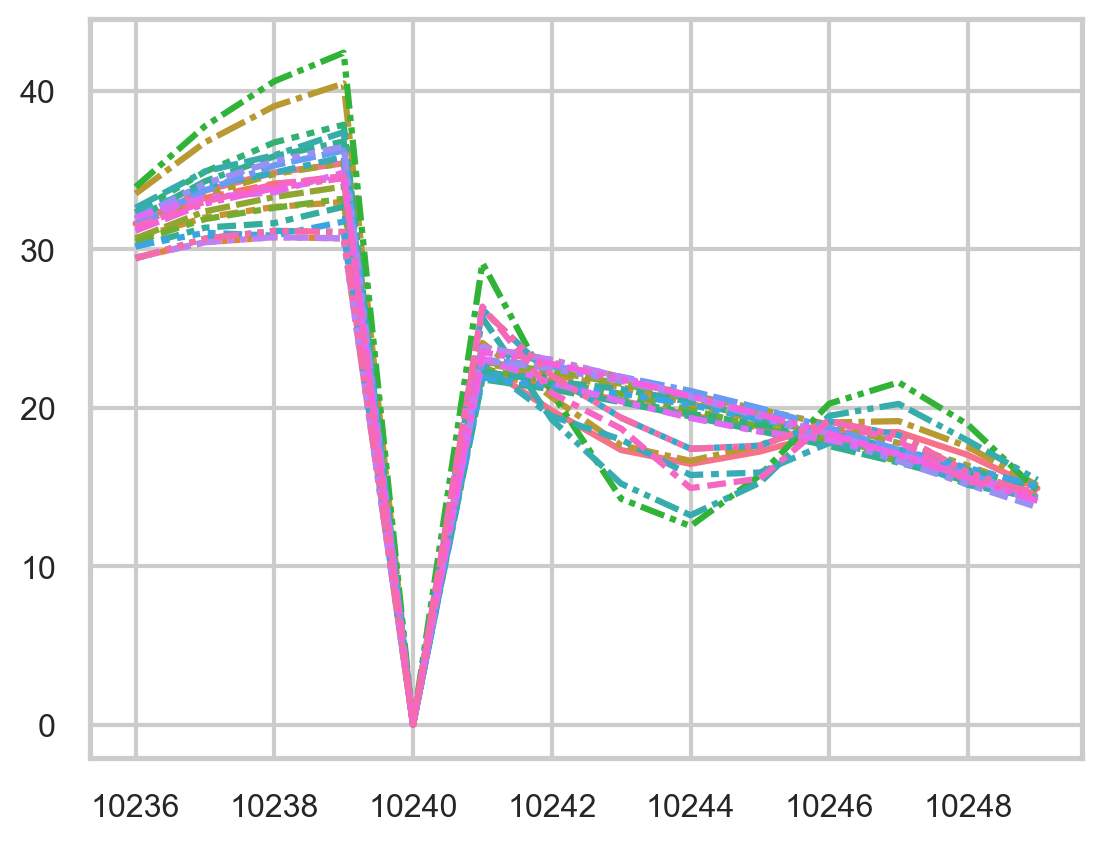

In [81]:
sns.lineplot(data=p1_.iloc[10236:10250], legend=False)
plt.show()

It's important to see the percentiles of these datasets.

In [82]:
its_crazy_far = p1Base_X.describe().iloc[:,0]
its_crazy_far

count    1.024000e+04
mean     1.110223e-17
std      1.000000e+00
min     -1.874910e-01
25%     -1.432243e-01
50%     -9.130100e-02
75%     -2.724956e-02
max      3.542509e+01
Name: FP1-F7, dtype: float64

Let's look at this in a more readable form.

**Normal Brain Activity**
Minimum: -0.1875
Mean: 0.00000000000000011
75th Percentile: -0.0273

**Last Value Before a Seizure**
Max (seizure): 35.4

Suffice to say, there is clearly something afoot when the the difference between the 75th percentile and the max value is that large.

# **What does the baseline (non-seizure) look like?**
Baseline implies this patient's normal brain activity.
In short and simplified, it was flat and normally distributed around zero.

* *Note: these values are **NOT** zero where zeros are shown. The Jupyter notebook's output isn't showing infinitesimally small numbers.*

In [83]:
p1_.iloc[1030:1050]

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
1030,0.0,0.0,0.0,0.000000,0.000000,0.001999,0.0,0.0,0.005251,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.087643,0.000000,0.0
1031,0.0,0.0,0.0,0.000000,0.000000,0.005145,0.0,0.0,0.041065,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.064614,0.000000,0.0
1032,0.0,0.0,0.0,0.000000,0.000000,0.011070,0.0,0.0,0.065134,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.060592,0.000000,0.0
1033,0.0,0.0,0.0,0.000000,0.000000,0.008640,0.0,0.0,0.082637,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.043472,0.000000,0.0
1034,0.0,0.0,0.0,0.000000,0.000000,0.009027,0.0,0.0,0.092134,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.033763,0.000000,0.0
1035,0.0,0.0,0.0,0.000000,0.005069,0.017155,0.0,0.0,0.087854,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.043032,0.000000,0.0
1036,0.0,0.0,0.0,0.000000,0.029524,0.017994,0.0,0.0,0.080707,0.0,...,0.016080,0.0,0.0,0.0,0.0,0.0,0.000000,0.025904,0.000000,0.0
1037,0.0,0.0,0.0,0.000000,0.061620,0.007887,0.0,0.0,0.069787,0.0,...,0.003820,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1038,0.0,0.0,0.0,0.000000,0.086634,0.000000,0.0,0.0,0.038095,0.0,...,0.024924,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000232,0.0
1039,0.0,0.0,0.0,0.000000,0.111060,0.000000,0.0,0.0,0.010569,0.0,...,0.019575,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.008943,0.0


# **The Overall Picture**
Let's look at the entire dataset: the baseline, the beginning of the seizure, the seizure itself, and the end of the seizure.

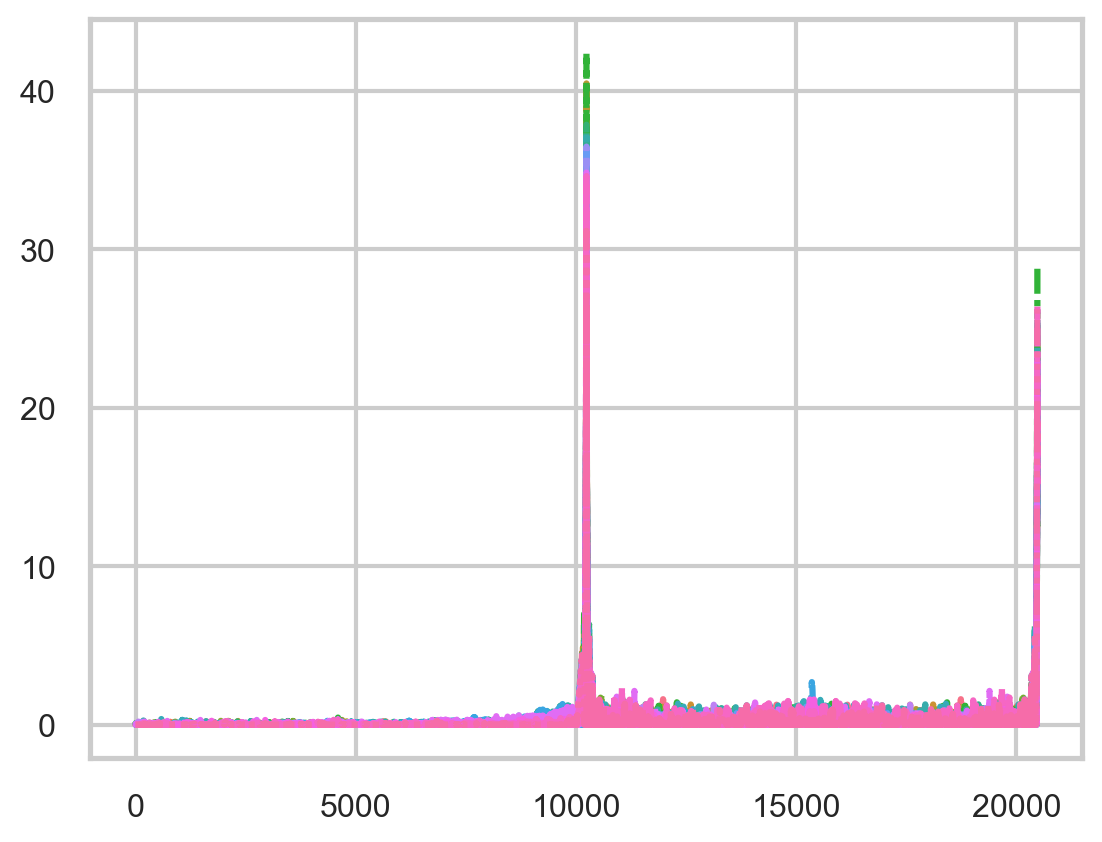

In [84]:
sns.lineplot(data=p1_, legend=False)
plt.show()

- The "baseline" is flat until it slowly begins to rise before the 10000 time mark.
- That rise would be the "aura" an epileptic feels, alerting them the seizure is imminent, and it occurs approximately 4 seconds before the seizure.
- Then there is the dramatic explosion in electrical output, beginning about 1 second before the seizure, followed by  the sudden drop as the brain's surge protector tries to control the event.
- The seizure is marked by the chaotic, roughness from approximately 10500 until the second spike after 20000. These values are clearly different from baseline values before the seizure.
- Finally there is a second spike in electrical output, just after which the seizure is over.

# **The Patients and Datasets**
The data source and the original paper are cited in the citations section.

There were two patients and three EEG readings:
- Patient one has an EEG reading then a second EEG reading 18 months later. Would the model predict a seizure from the same patient?
- Patient two has a single EEG reading but has a Vegas Nerve Stimulator surgically implanted to control seizures. Would the model still be able to predict this?
- Each EEG reading is about 80 seconds long, the first 40 seconds of which is 'baseline' and the last 40 seconds of which is the 'seizure' and the other two sets are split accordingly.
- The first 40 seconds is then the X-training set and the last 40 seconds is the y-training set.
- Finally, the model is trained on patient one's X and y, which is then used to to predict the y's for the other two.

# **Data Sources and  Processing**
The original datasets were in a .edf file.
From https://en.wikipedia.org/wiki/European_Data_Format,

>European Data Format (EDF) is a standard file format designed for exchange and storage of medical time series. Being an open and non-proprietary format, EDF(+) is commonly used to archive, exchange and analyse data from commercial devices in a format that is independent of the acquisition system.

Since there is no *pandas.read_edf()*  method, MNE-python (see citations) was used to read in the raw numpy arrays, upon which it's built.

EEGs are notorious for noise, as is most signal processing. A simple blinking of the eyes can cause a visible spike, which is brief (as opposed to a sustained seizure). Therefore, the data was run through ScyPy's Fast Fourier Transform (FFT) to obtain the core signals and then back via the Inverse Fast Fourier Transform (IFFT) to get it back into a time series.

And of course the data was normalized.

# **The Models**

**Can an "out of the box" supervised, unsupervised, deep learning, or Recurrent Neural Network  model predict a seizure from the baseline**

The short answer was NO, and it wasn't even close!
And if you are familiar with models, you may recognize why.

There are no patterns in the baseline that would predict the spike and the elevated outputs during the seizure.

In mathematics, this may represent the presence of Chaos: A butterfly flaps its wings at time = 0 somewhere and causes a tornado at time = n somewhere else.

That analogy is a simplification saying that the intial conditions in the atmosphere were such and such at time = 0 somewhere and those conditions built and changed over time in such a way that at time = N, those changes resulted in a tornado somewhere else, but it isn't possible to know which butterfly, much less that butterfly's location, caused the event.

For seizure prediction, it's impossible to know at which point in time the brain's trillions of neurons began the changes needed to begin the process of the processes involved in the seizure tornado.

# **Supervised Learning**
### **Ridge Linear Regression**
 Chosen due to its support for multiple variables and of course doomed since the columns are certainly not independent of one another nor were they linear.

Surely, one agrees the brain isn't linear, but less obvious is why are the columns not independent of one another?

Not only are adjacent EEG leads used to take differences in numbers, but, in many cerebral areas, the last EEG lead is the first one in the next column:
- Column 1: FP1-F7, and column 2: F7-T7. They have F7 in common.

Moreover, one lead is surely picking up ambient electrical signals from nearby areas, hence the reason a Fast Fourier Transform (FFT) can be applied to the data to reduce noise.

Predictions?

In [85]:
print(f"p18: {min(ridge_accuracy_['p18 prediction'])}\nvns: {min(ridge_accuracy_['vns prediction'])}")

p18: 0.6734120244565217
vns: 0.20629670516304346


67% accuracy was promising, but remember it's the same patient.
But 20% for the VNS patient is what I think would be more typical from a different patient.
In fact, I believe any accurately predicted values in a different patient than who the model was trained on would be nothing more than 'It had to get some right just from random chance.'

# **ARMA Time Series**
There is some talk that seizures are cyclical, but it's just that: talk. As the husband and father to epileptics, I can tell you it may seem like that for a window in time, but that's quickly destroyed when there are suddenly days and weeks of seizures followed by no seizure activity. If it is cyclical, it's not a cycle based on the seasons. The brain is marching to it's own drum beat.

The data was stationary via *statsmodels.adfuller()* method.
ARMA was chosen via statsmodels autocorrelation analysis.
The lag was one second in the past.

In [86]:
p1_compare = pd.concat([p1_copy['means'].iloc[10239:10253], p1_prediction, p1_.iloc[10239:10253, -1]], axis=1)
p1_compare.rename({0:'model predictions', 'means': 'actual means', 'T8-P8-1': 'actual values'}, axis=1, inplace=True)
p1_compare.iloc[:,1:]

,model predictions,actual values
10239,NaN,31.098121
10240,NaN,0.000000
10241,4.871574,26.212566
10242,0.128946,22.010125
10243,0.089039,19.372481
10244,0.076108,17.413116
10245,0.085078,17.612605
10246,0.086328,19.150796
10247,0.099410,18.271513
10248,0.097106,15.933916


Time series models were a failure.

# **TensorFlow Linear Regression Neural Network**

1. This was a Keras Sequential Model
2. There were 6 layers (the number of layers didn't change the end results).
3. The first layer had 500 nodes and they decreased steadily to the mathc the number of columns to predict (the number of starting nodes didn't change the end results either).
4. Early Stopping was used.
5. Activation: relu (changing the activation didn't improve the model).
6. Loss and Metric: Mean Absolute Error
7. Optimizer: Adam (changing the optimizer didn't improve the model).
8. Like the others, the X-train was the baseline and the y-train was the seizure.
9. The predictions were carried out the other two data sets.

And the predictions on the first patient:


In [87]:
a = pd.DataFrame(p18_pred, columns=p1_.columns.tolist())
a_ = pd.concat([second.iloc[:,1], p18Seize_y.iloc[:,1]], axis=1, ignore_index=True)
a_.rename({0:'Column 1 Predictions', 1:'Column 1 Actuals'}, axis=1)

,Column 1 Predictions,Column 1 Actuals
0,-0.304735,-0.566187
1,-0.326690,23.467971
2,0.358836,22.552289
3,0.006348,21.266972
4,-0.303463,19.835811
...,...,...
10235,10.298815,18.397951
10236,10.934884,19.835811
10237,11.334816,21.266972
10238,15.977510,22.552289


This was surprising since the Mean Absolute Errors were low, but apparently not low enough.

In [88]:
p1eval

{'loss': 0.13141149282455444, 'mae': 0.13141150772571564}

# **TensorFlow Linear Recurrent Neural Network via LSTM**
There were some further processing steps required for this model.
LSTM's (Long Short Term Memory) strength is in its ability to remember past values by carrying them through it's "cell state," and this drastically increased the training time to unrealistic levels with respect to me wanting to graduate from Springboard this year.

Therefore, I chose cell values that were well above the 75th percentile so the cell state had less to remember. As shown earlier, the distance between the minimum value and the 75th percentile was basically zero, so I chose an electrical output of 0.1. The first 0.1 value occurs about 4 seconds before the seizure and could be considered the start of the "aura" phase as it never dips below this value again before climbing into the 30s and the seizure.

The LSTM model (and these hyperparameters were varied to find optimization):
1. Again a Sequential Model.
2. Number of LSTM layers: 2 (recommended for complex models).
3. 23 output nodes to match features.
4. Random normal initializers to start the random walk location.
5. Activations: hyperbolic tangent (as opposed to sigmoid, and it's important to only use one of these two for the cell state's ability to minimize an explosion in numbers).
6. Dropout: 0.2 to avoid overfitting (not that that mattered).
7. Batch size = 1 (so the cell state memory is carried throughout)
8. Epochs: 2000

And the loss as the model approached the seizure?
These values should be near zero.

In [89]:
lstm1 = lstm(
		tf.reshape(p1_Xgt_0point1_tensor, input_shapes_reduced[0]),
		tf.reshape(p1_ygt_tensor, input_shapes_reduced[0]),
		inputshape=input_shapes_reduced[0])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (1, 1344, 23)             4324      
                                                                 
 lstm_11 (LSTM)              (1, 1344, 23)             4324      
                                                                 
 dense_41 (Dense)            (1, 1344, 23)             552       
                                                                 
Total params: 9,200
Trainable params: 9,200
Non-trainable params: 0
_________________________________________________________________
None
KerasTensor(type_spec=TensorSpec(shape=(1, 1344, 23), dtype=tf.float32, name=None), name='dense_41/BiasAdd:0', description="created by layer 'dense_41'")


In [90]:
lstm1.history.history['loss'][-5:]

[100.95152282714844,
 101.10453796386719,
 100.87142181396484,
 101.3758773803711,
 101.82475280761719]

Clearly not successful.
And that is seen in the prediction for one of the datasets.

In [91]:
b = tf.squeeze(tf.reshape(predict_18, input_shapes_reduced[0]).numpy())
b_df = pd.DataFrame(b)
b_df_ = pd.concat([pd.DataFrame(b.numpy()).iloc[:,1], p18Seize_y.iloc[:,1]], axis=1, ignore_index=True)
b_df_.rename({0:'Column 1 Predictions', 1:'Column 1 Actuals'}, axis=1, inplace=True)
b_df_.head()

,Column 1 Predictions,Column 1 Actuals
0,-0.036742,-0.566187
1,-0.036415,23.467971
2,-0.027545,22.552289
3,-0.024296,21.266972
4,-0.022073,19.835811


# **Unsupervised Clustering and Epilepsy Diagnosis**
A surprising outcome when training a KMeans algorithm came about due to the gap between the 75th percentile and the max values in the dataset.

Let's take another look at one of the dataset's gaps.

In [92]:
c = pd.concat([p1Base_X.describe().T, p1Seize_y.describe().T], axis=0)
c[['75%', 'max']].mean()

75%     0.059558
max    29.286185
dtype: float64

This gap seems to be ideal for clustering, but to what ends?

First, let's see where the centroids are in the 2 clusters.

Naturally, choosing 2 clusters was obvious because a cell value is either in the baseline or it's in the heightened values leading to a seizure.

In [94]:
pd.DataFrame(gammaccuracy_['p1 prediction']['cluster nodes'].numpy(), index=['Non Seizure', 'Seizure'])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Non Seizure,0.105171,0.097543,0.101175,0.099661,0.100198,0.094592,0.098148,0.106111,0.106269,0.095101,...,0.112433,0.102417,0.100671,0.092688,0.094691,0.101175,0.107391,0.095079,0.114407,0.102417
Seizure,17.016886,17.502805,17.642929,17.358837,16.770729,17.503596,17.469486,17.373833,16.049212,17.001168,...,17.103854,17.448690,17.967100,17.418973,17.473306,17.642929,17.599075,17.654407,17.505636,17.448690


This is in line with the data expectations:
1. The electrical output in the baseline for a patient is a low number, matching the values seen in the percentiles below the 75th percentile.
2. The electrical output leading to the seizure (remember, in the seconds before the seizure, values didn't dip below 0.1) is roughly between 0.1 and 35.

Neurologists use EEG in conjunction with other tests to diagnose seizures. In addition to EEGs, doctors rely on visual evidence, blood tests, and even more costly scans like an MRI.

The list of things that naturally increase electrical output in the brain is limited, as explained by  https://www.goodrx.com/conditions/epilepsy/what-happens-during-seizure:
>Normally, the billions of neurons or nerve cells in the brain fire off electrical impulses individually, allowing the neurons to communicate with each other to help your body function appropriately. In a seizure, those neurons all fire off at the same time, creating abnormal electrical activity.

In other words, a coordinated increase across all areas of the brain is not natural and is a seizure (*Note: there are many types of seizures; therefore, it may be better to call it 'abnormal brain activity'*).

This is seen in these datasets as all row instances in time increase in energy across the columns as the seizure approaches.

Thus, running a clustering algorithm during an EEG and quickly reviewing the centroids would be strong evidence the patient had a seizure even if there were no other evidence, making clustering a tool in the toolset for doctors.

Let's see if this is consistent across all three patients.

In [95]:
print(f"Patient 1\n"
	  f"Centroid 1: {tf.reduce_mean(gammaccuracy_['p1 prediction']['cluster nodes'][0])} mV\n"
	  f"Centroid 2: {tf.reduce_mean(gammaccuracy_['p1 prediction']['cluster nodes'][1])} mV\n\n"
	  f"Patient one 18 months later\n"
	  f"Centroid 1: {tf.reduce_mean(gammaccuracy_['p18 prediction']['cluster nodes'][0])} mV\n"
	  f"Centroid 2: {tf.reduce_mean(gammaccuracy_['p18 prediction']['cluster nodes'][1])} mV\n\n"
	  f"Patient 18\n"
	  f"Centroid 1: {tf.reduce_mean(gammaccuracy_['vns prediction']['cluster nodes'][0])} mV\n"
	  f"Centroid 2: {tf.reduce_mean(gammaccuracy_['vns prediction']['cluster nodes'][1])} mV")

Patient 1
Centroid 1: 0.10134668392412163 mV
Centroid 2: 17.3674323319266 mV

Patient one 18 months later
Centroid 1: 0.10280081187817895 mV
Centroid 2: 19.03651032782568 mV

Patient 18
Centroid 1: 0.11491301122255833 mV
Centroid 2: 26.235263404230004 mV


So all three patients show a second centroid that is orders of magnitude larger than their baselines, and as such, had seizures and are Epileptics.

# **A Simple Solution to a Complex Problem for Families and Hospitals**

What to conclude from this? Can seizures be predicted? Not from these models.

But was I asking the right question at the beginning?

What would a seizure prediction look like and what purpose would it serve?

>"You will have a seizure at 3:03 am, so take a rescue medication 5 minutes prior to stop it."

This is clearly not possible. The evidence that seizures fall into a category of mathematical chaos is too strong, eliminating prediction by definition. And if the seizure didn't occur at 3:03 but you took the benzo (short for Benzodiazepines, an addictive class of drugs that includes Xanex and Valiums), you'd  be an addict with another set of problems to add to your seizures, constantly needing to take more and more for the same effect.

So I asked myself the question:
>Looking back when my daughter was born and was having thousands of seizures a day, what would have I liked to see in an Epilepsy Monitoring Unit that could have made our lives less stressful?

And that answer is simple:
>I wish the EEG computer could've alerted me, and me only, that my daughter was having a silent seizure in the middle of the night that could've killed her while I was trying to get sleep for the first time in days, and when that alert sounded, I could determine if I need to call the nurses because it was in fact a seizure.

So why can't the EEG computer do that? I have no idea, because I'm about to show them how to do it, and it didn't take a fancy model.

## **First, know how it's done now:**
1. My daughter is hooked up to the EEG with it's fancy monitor that shows the wave patterns.
2. I'm instructed to watch my daughter all the time.
3. If I suspect there is a seizure, I press a button to mark that event on the EEG machine for review by doctors and manually record it on a piece of paper.
4. If this button is pressed, the room lights up bright and sounds an alarm, soon after which a team of nurses and floor doctors come in ready to act if needed.

What steps would I eliminate?
All of them after 1.

What is wrong with steps 2, 3, and 4?
- Step 2 requires a parent to stress out 24 hours a day as they wait, watch, and not sleep, needing to catch that seizure that may not come (it is considered bittersweet, ironic humor in hospitals that an epileptic may not have a seizure while hooked up to an EEG. Something about the environmental variables being different than at home, but even science is only guessing why. My daughter's case was severe, so this wasn't the case, but my daughter was the exception to the common epileptic rule, most parents suffer because of this "natural" phenomenon in this "unnatural" environment). Being stressed and not sleeping is not healthy (as I can attest after totalling 2 cars due to lack of sleep and living off energy drinks for days).
- Step 3 starts with the problem with the step: "if I suspect there is a seizure." If I knew it was a seizure, why do I need the EEG and the doctors and the hospital bills? I could just get the med script for it. Aside from that quaint humor, the real problem is with the range of possible seizures my daughter could have. She had 7 types and 6 of those were silent. The scenario is: I'm sleeping, finally, and sleep through a seizure that kills her, becuase I didn't press the button to save her.
- Step 4 brings the needed help to save her, but if my suspicion is wrong, and it's not a seizure, then the bright lights woke my daughter (epileptics need sleep as a first line of defense to prevent seizures) which could cause a seizure, not to mention the resources pressing the button absorbed in hospital productivity, which costs money and possibly put other patients on the floor at risk when resources were taken from them.

## **My Solution Learned in this Capstone:**
1. Hook up the patient to the EEG and run the signals through the Fast Fourier Transform (FFT) to remove noise and back to time dimension via the Inverse FFT.
2. Take the mean of these returned signals in that moment in time.
3. Establish a mean output that would indicate an abnormal electrical output: 0.1 microvolts for example (the value I established earlier).
4. If that mean signal strength is sustained (it's not an eye blink for example) an intermittent alert sounds, informing me that something could be wrong. If the mean electrical output continues climbs past the centroid value obtained in the clustering model, The tone becomes loud and sustained, waking me up.
5. This would wake me up if I were asleep and I could determine by sight if it's a seizure and then press the button which would alert the hospital staff that the even is significant enough to warrant their resources.

The following code block is an example.
If the value is between 0.1 and 1, the intermittent tone sounds.
Sustained values between 1 and 17, the tone quickens (Note that 17 is approximately the centroid location of a seizure for this dataset).
Above 17, a seizure is very probable.

Of course the values for seizure alerts would vary. A patient's baseline will change depending on activity levels throughout the day.

In [105]:
# I've taking a subset of the dataframe since we know where the seizure is, but this would happen in realtime.
p1_1 = p1_.iloc[10068:10252]

for (index, row) in p1_1.iterrows():
	if 0.1 < row.mean() < 1:
		print(f'WARNING SEIZURE POTENTIAL NOTICED AT TIME = {index}')
	if 1 <= row.mean() < 17:
		print('--------------------------------------------------------')
		print(f'WARNING SEIZURE LIKELY = {index}')
	if row.mean() > 17:
		print('--------------------------------------------------------')
		print(f'SEIZURE! SEIZURE! = {index}:\n\nvalue: {row.mean()}')

WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10068
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10069
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10070
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10071
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10072
--------------------------------------------------------
WARNING SEIZURE LIKELY = 10073
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10074
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10075
--------------------------------------------------------
WARNING SEIZURE LIKELY = 10076
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10077
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10078
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10079
--------------------------------------------------------
WARNING SEIZURE LIKELY = 10080
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10081
WARNING SEIZURE POTENTIAL NOTICED AT TIME = 10082
--------------------------------------------------------
WARNING SEIZURE LIKELY = 10083
------------------------------------------------

# **This would have made the hospital life alot easier.**